In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
from scipy.spatial.distance import pdist, squareform
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    C = [1,1]

    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])

    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)

    I.extend(J)
    C.extend(i)

    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I


def entropy(probs):
    
    return -probs.dot(np.log2(probs))


def mutual_info(df):
    
    Hx = entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = df.groupby(list(df.columns.values)).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    return {'H_'+list(df)[0]:Hx,'H_'+list(df)[1]:Hy,'MI':MI,'NMI':NMI} 


In [3]:
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [4]:
##Question 1

###1a
df = food.iloc[:,4:57] #4th column to the 57th column are the features

###1b
scaled = StandardScaler()
scaled.fit(df)
foodscaled=scaled.transform(df)   #tranforming into the scaler values of the features

###1c
print("***\nQ1.c: foodscaled matrix details")
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Min:",round(foodscaled.min()))
print("Max:",round(foodscaled.max()))
print("Mean:",round(foodscaled.mean()))
print("Standard Deviation:",foodscaled.std(),"\n***")

***
Q1.c: foodscaled matrix details
Number of rows: 5740
Number of columns: 53
Min: -2.0
Max: 76.0
Mean: 0.0
Standard Deviation: 1.0 
***


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


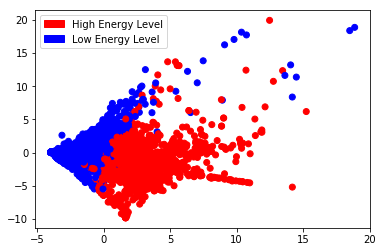

In [5]:
#Question 2
import matplotlib.patches as mpatches  #for the legend
###2a
food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>=1000, '1', '0')  #checking of greater than 1

###2b
pca = PCA(n_components=2)
pca = PCA().fit(foodscaled)
foodreduced=pca.transform(foodscaled)   #tranforming into scaled PCA values

###2c
plot_df = pd.DataFrame(foodreduced)
plt.scatter(plot_df[0],plot_df[1],color=np.where(food['EnergyLevel']=='1', 'r', 'b')) #scatter plot
red_patch = mpatches.Patch(color='red', label='High Energy Level')
blue_patch = mpatches.Patch(color='blue', label='Low Energy Level')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

Question 2d answer here

From the scatter plot we see the the Principal Component Analysis(PCA) of the features of the dataframe food. The function of PCA has found the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information. Also in the scatter plot we see the Energy level of the food categoried on the basis of Energy, with dietary fibre (kJ), if Energy, with dietary fibre (kJ) is higher than 1000 kJ it is plotted as high energy level otherwise it is low energy level that is it is under 1000 kJ.

Advantages of PCA:
1)Removes Correlated Features- all the Principal Components are independent of one another.
2)Improves Algorithm Performance- if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice.
3)Reduces Overfitting- PCA helps in overcoming the overfitting issue by reducing the number of features.
4)Improves Visualization- PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily.

Disadvantages of PCA:
1)Independent variables become less interpretable- Principal Components are not as readable and interpretable as original features.
2)Data standardization is must before PCA- If PCA is applied on a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.
all the categorical features are required to be converted into numerical features before PCA can be applied.
3)Information Loss- Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


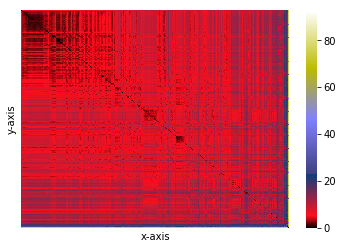

In [6]:
#Question 3

###3a
food['Food Category']=food['Survey ID'].astype(str).str.slice(stop=2)  #first 2 number of 'Survey ID' is 'Food Category'

###3b
df1=food.ix[(food['Food Category'] =='13') |(food['Food Category'] =='20') |(food['Food Category'] =='24')]
df2 = df1.iloc[:,4:57]
scaled = StandardScaler()
scaled.fit(df2)
foodscaledsample=scaled.transform(df2)

###3c
RV, R, I = VAT(foodscaledsample)  #computing the ordered dissimilarity matrix for the foodscaledsample matrix

###3d
x = sns.heatmap(RV, cmap='gist_stern', xticklabels=False, yticklabels=False)  #plotting heatmap
x.set(xlabel='x-axis', ylabel='y-axis')
plt.show()

Question 3e here

The value of the VAT() function, that is to compute the ordered dissimilarity matrix, is very much similar from all size it forms roughly 2 clusters which are very close to each other majorly resulting into one cluster whose value is very close to 0 as it is all pairwise distances between objects which is very minimal. 

Use of different colormaps is done to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

Consider if there is a better alternative to gradient colors when encoding your most important values. Since the values are very close to each other and it is all clustered.

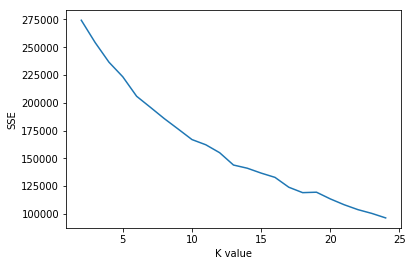

In [7]:
#Question 4

###4a 
sse = {}
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=100).fit(foodscaled)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))  #x-y plot
plt.xlabel("K value")
plt.ylabel("SSE")
plt.show()

Question 4b answer here

For the Kmeans to have less sum of squared errors(SSE) the clusters of the dataframe has to have higher k value.

The elbow is at almost a curve meaning there is no drastic change in the SSE value for any cluster.

This is observed as the k clustering is very continuous and the higher it goes the more the SSE decreses.

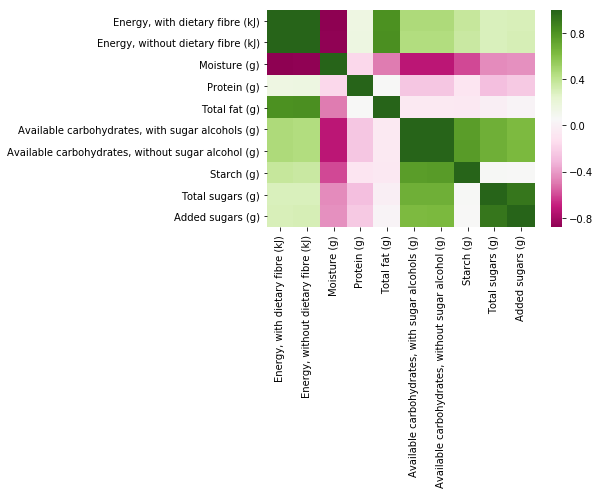

In [8]:
###Question 5

###5a
new_df=df.iloc[:,0:10]   #first 10 features
Pearson_correlation_matrix=new_df.corr()
y = sns.heatmap(Pearson_correlation_matrix, cmap='PiYG', xticklabels=Pearson_correlation_matrix.columns, yticklabels=Pearson_correlation_matrix.columns)   #plotting heatmap
plt.show()

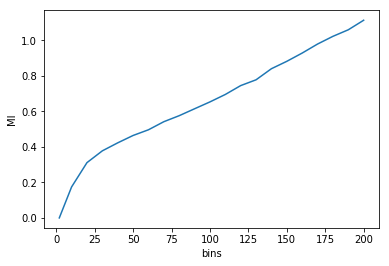

In [9]:
###5b code

from sklearn.metrics import mutual_info_score       #https://stats.stackexchange.com/questions/179674/number-of-bins-when-computing-mutual-information

def calc_MI(x, y, bins):     #using new function by putting bins in the parameter
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)   #calculating MI
    return mi
MI_series={}

MI_series[2] = calc_MI(food["Protein (g)"], food["Energy, with dietary fibre (kJ)"], 2)   #taking MI and bin number

for i in range(10, 210, 10):   #looping bins
    MI_series[i]= calc_MI(food["Protein (g)"], food["Energy, with dietary fibre (kJ)"], i)  #taking MI and bin number
plt.plot(list(MI_series.keys()), list(MI_series.values()))  #x-y plot
plt.xlabel("bins")
plt.ylabel("MI")
plt.show()

Question 5b comment here

The mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. Therefore the more the number of bins the higher the MI as it takes more information.

In [10]:
###5c code
Pearson_correlation=df.corr()

#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#using new function
def get_redundant_pairs(df):    #Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n): # to get top 10 values of correlations
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top 10 Feature-pairs for Pearson Correlation")
print(get_top_abs_correlations(Pearson_correlation, 10))




Top 10 Feature-pairs for Pearson Correlation
Available carbohydrates, with sugar alcohols (g)  Available carbohydrates, without sugar alcohol (g)    0.999991
Alpha-tocopherol (mg)                             Vitamin E (mg)                                        0.999969
Added sugars (g)                                  Free sugars (g)                                       0.999841
Beta-carotene (µg)                                Provitamin A (b-carotene equivalents) (µg)            0.999817
Energy, with dietary fibre (kJ)                   Energy, without dietary fibre (kJ)                    0.999436
Total sugars (g)                                  Free sugars (g)                                       0.994769
C20:5w3 Eicosapentaenoic (mg)                     Total long chain omega 3 fatty acids (mg)             0.994664
Protein (g)                                       Tryptophan (mg)                                       0.994449
Total Folates  (µg)                               D

In [11]:
Question 5c comment here

SyntaxError: invalid syntax (<ipython-input-11-3c1fb53b91e5>, line 1)

***
Q6.a: Train Test Split Results
X_train matrix: (4592, 53)
y_train labels: (1, 4592)
X_test matrix: (1148, 53)
y_test labels: (1, 1148) 
***


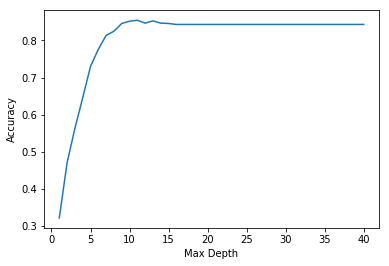

In [12]:
##Question 6


###6a
#food
X_train, X_test, y_train, y_test = train_test_split(foodscaled,food[["Food Category"]].values, train_size=0.80, test_size=0.20, random_state=0)   #splitting into 80% and 20%
print("***\nQ6.a: Train Test Split Results")
print("X_train matrix:",X_train.shape)
print("y_train labels:",y_train.transpose().shape)
print("X_test matrix:",X_test.shape)
print("y_test labels:",y_test.transpose().shape,"\n***")

###6b
descision_tree={}   #making a dictionary and put the max_depth as keys and accuracy as values
for j in range (1, 41):
    dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=j)
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    descision_tree[j]=accuracy_score(y_test, y_pred)
plt.plot(list(descision_tree.keys()), list(descision_tree.values()))  #x-y plot
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Question 6c comment here

The plot has a higher accuracy when the maxdepth reaches 5 and continues to have the same high accuracy till the end

The reason is because there is more posiiblity to predict accurately the classification at an higher depth.

In [13]:
#Question 7

###7a
knn = KNeighborsClassifier(n_neighbors=1)  #using number of neighbours as 1
knn.fit(X_train, y_train) 
y_pred_1=knn.predict(X_test)
y_pred_2=knn.predict(X_train)
print("***\nQ7a: Food category prediction using k-NN (k=1)")
print("Train accuracy:",f'{round(accuracy_score(y_train, y_pred_2),1)*100}%')
print("Test accuracy:",f'{round(accuracy_score(y_test, y_pred_1),1)*100}%',"\n***")

##7b
knn = KNeighborsClassifier(n_neighbors=3)   #using number of neighbours as 3
knn.fit(X_train, y_train) 

print("***\nQ7b: Food category prediction using k-NN (k=3)")
print("Train accuracy:",f'{round(accuracy_score(y_train, y_pred_2),1)*100}%')
print("Test accuracy:",f'{round(accuracy_score(y_test, y_pred_1),1)*100}%',"\n***")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


***
Q7a: Food category prediction using k-NN (k=1)
Train accuracy: 100.0%
Test accuracy: 90.0% 
***
***
Q7b: Food category prediction using k-NN (k=3)
Train accuracy: 100.0%
Test accuracy: 90.0% 
***


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Question 7c comment here

The values of 7(a) and 7(b) are same as the value of k is not very different and the prediction of the accuracy score is almost the same. 


Question 7d comment here

k-NN predictions is used to predict the value of a variable of interest for each member of a target data set. The structure of the data generally consists of a variable of interest (i.e., amount purchased), and a number of additional predictor variables. For the k-NN predictions the k nearest neighbour has already a value under 1 and therefore does not need to be standardized.

In [14]:
#Question 8 code


Question 8 discussion here

In [15]:
#Q5c (part b)
def get_top_MI(df, n):
    TOP_MI={}
    b=0
    for a in get_redundant_pairs(df):
        TOP_MI[b]=(a[0],a[1],calc_MI(df[a[0]], df[a[1]], 20) )  #using calc_MI defined in 5(a)
        b=b+1
    return(TOP_MI)
    
MI_count=get_top_MI(df, 10)
MI_count


{0: ('Folate, natural  (µg)',
  'Niacin derived equivalents (mg)',
  0.009470651409773429),
 1: ('Total long chain omega 3 fatty acids (mg)',
  'Iodine (I) (µg)',
  0.001375746128711991),
 2: ('Total long chain omega 3 fatty acids (mg)',
  'Total Folates  (µg)',
  0.004794388740134893),
 3: ('Tryptophan (mg)', 'Total Folates  (µg)', 0.005778373322196294),
 4: ('Calcium (Ca) (mg)',
  'Preformed vitamin A (retinol) (µg)',
  4.384345732658568e-05),
 5: ('Total monounsaturated fat (g)',
  'Preformed vitamin A (retinol) (µg)',
  0.0018645017116184419),
 6: ('Total monounsaturated fat (g)',
  'Alpha-tocopherol (mg)',
  6.19283100949798e-05),
 7: ('Free sugars (g)',
  'Energy, with dietary fibre (kJ)',
  0.16874256339758587),
 8: ('Vitamin B6 (mg)',
  'Available carbohydrates, with sugar alcohols (g)',
  0.003254964915455929),
 9: ('Cholesterol (mg)', 'Starch (g)', 0.01772765532103321),
 10: ('Sodium (Na) (mg)',
  'Provitamin A (b-carotene equivalents) (µg)',
  8.605982330641576e-05),
 11: ('